In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
import pandas as pd #Manipulacion y analisis de datos
#sklearn, para tareas de aprendizaje automatico
#utilizamos la funcion train_test_split del modulo model_selection
#Esta funcion se utiliza para dividir un conjunto de datos
# en dos subconjuntos, uno para entrenamiento y otro para prueba
from sklearn.model_selection import train_test_split
#Importamos la funcion LabelEncoder del modulo preprocessing
#Se utiliza para codificar etiquetas categoricas en forma numerica
from sklearn.preprocessing import LabelEncoder

In [3]:
#Carga de dataset
data = pd.read_csv('INNHotelsGroup.csv', delimiter=',')

In [4]:
display(data)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
#eliminamos la columna Booking_ID
# axis=1, indica que se está eliminando una columna y no una fila
# inplace=True, indica que la eliminación se realizará directamente en el DataFrame data
data.drop(['Booking_ID'], axis=1, inplace=True)

In [7]:
#Transformacion de columnas categoricas a numericas
#selecciona las columnas del dataset de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns
#El for recorrera cada columna categorica
for columna in columnas_categoricas:
  #El LabelEncoder se utiliza para codificar las etiquetas categóricas como valores numéricos
  le = LabelEncoder()
  #aplica la transformación a la columna actual
  #El método fit_transform del LabelEncoder ajusta el codificador a los datos de la columna
  # y transforma las etiquetas categóricas en valores numéricos
  data[columna] = le.fit_transform(data[columna])

In [8]:
display(data)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [9]:
#[:, :17] indica que se seleccionan todas
# las filas y las columnas desde la posición 0 hasta la posición 16 (17 columnas en total)
X = data.iloc[:, :17]
#[:, 17] indica que se seleccionan todas las filas y la columna en la posición 17
y = data.iloc[:, 17]
#y.size devuelve el número de elementos en y
#m = y.size

In [10]:
print(X)
print('-'*40)
print(y)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       type_of_meal_plan  required_car_

In [11]:
#Funcion train_test_split, que recibe X y y, test_size es el tamaño de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
print("Datos entrenamiento> ")
print(X_train)
print('-'*40)
print(y_train)

Datos entrenamiento> 
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
21296             1               0                     0                  1   
1098              1               0                     2                  4   
23163             2               2                     2                  0   
22205             2               0                     1                  2   
8001              2               0                     2                  2   
...             ...             ...                   ...                ...   
23346             2               0                     0                  4   
11863             2               0                     0                  3   
27063             1               0                     0                  1   
8366              2               0                     2                  2   
17530             2               0                     1                  2   

       type_of_me

In [13]:
print("Datos prueba> ")
print(X_test)
print('-'*40)
print(y_test)

Datos prueba> 
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
25746             1               0                     0                  2   
6197              1               0                     1                  0   
4237              2               0                     0                  4   
21849             2               0                     0                  4   
22985             2               0                     0                  3   
...             ...             ...                   ...                ...   
3165              1               0                     0                  2   
25769             2               0                     2                  0   
25721             2               0                     0                  2   
15672             1               0                     2                  1   
9970              2               0                     1                  2   

       type_of_meal_plan

In [14]:
def  featureNormalize(X):
    X_norm = X_train.copy()
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])

    mu = np.mean(X_train, axis = 0)
    sigma = np.std(X_train, axis = 0)
    X_norm = (X_train - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

print('Media calculada:\n',mu)
print('Desviación estandar calculada:\n',sigma)
print('Matriz con valores normalizados:\n',X_norm)

Media calculada:
 no_of_adults                               1.845589
no_of_children                             0.104135
no_of_weekend_nights                       0.805376
no_of_week_nights                          2.204411
type_of_meal_plan                          0.512750
required_car_parking_space                 0.031013
room_type_reserved                         0.710544
lead_time                                 85.354238
arrival_year                            2017.820331
arrival_month                              7.412784
arrival_date                              15.589524
market_segment_type                        3.549862
repeated_guest                             0.026327
no_of_previous_cancellations               0.023088
no_of_previous_bookings_not_canceled       0.161130
avg_price_per_room                       103.482755
no_of_special_requests                     0.620848
dtype: float64
Desviación estandar calculada:
 no_of_adults                             0.520665
n

In [16]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    #creamos un arreglo de ceros en g, de la misma cantidad de z
    g = np.zeros(z.shape)
    #calcula la funcion sigmoideal
    g = 1 / (1 + np.exp(-z))   #e^(-z)

    return g

In [17]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [18]:
# Configurar la matriz adecuadamente, y agregar una columna de unos
m= X_train.shape[0]
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [19]:
def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [20]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [21]:
# Obtener la primera fila como una serie
primera_fila = X_test.iloc[0]

# Imprimir la primera fila en forma de fila
for valor in primera_fila:
    print(valor, end=',')

1.0,0.0,0.0,2.0,0.0,0.0,0.0,164.0,2017.0,10.0,2.0,3.0,0.0,0.0,0.0,100.0,0.0,

theta calculado por el descenso por el gradiente: [ 1.18319068 -0.02055259 -0.00914591 -0.11725934 -0.08687603 -0.10306544
  0.251467    0.11225187 -1.19741256 -0.23722514  0.11620735 -0.01320936
 -0.75026371  0.16316743  0.03658669  0.01665294 -0.63270625  1.05261222]
El resultado entre falso o verdadero es (usando el descenso por el gradiente):0


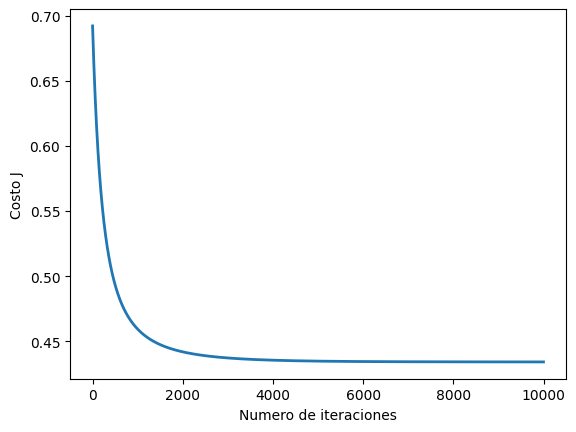

In [22]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(18)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 10.0, 2018.0, 1.0, 19.0, 4.0, 0.0, 0.0, 0.0, 68.5, 2.0]
aprueba = sigmoid(np.dot(X_array, theta)) 

print('El resultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [23]:
print(X_test.shape)

(7255, 17)


In [24]:
m=X_test.shape[0]
print(m)

7255


In [25]:
n=X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [26]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_test.size  # numero de ejemplos de entrenamiento
    #Se define una pequeña cantidad epsilon para evitar problemas de logaritmo de cero en el cálculo de la función de costo
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_test.dot(theta.T))

    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1 - y_test).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)

    return J, grad

In [27]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Gradiente en theta inicial (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Gradiente en theta inicial (zeros):
	[-0.17, -0.30, -0.02,-0.11, -0.33, -0.08, -0.01,-0.11, 2.28, -345.27, -1.30,-2.62, -0.57, -0.01, -0.00,-0.06, -15.63, -0.20]


In [28]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.5, 0.8, -1.2, 0.3, -0.7, 1.0, -1.5, 0.2, -0.9, 1.3, -0.4, 0.6, -1.1, 0.9, -0.3, 1.2, -0.8, 0.5])

print(test_theta)
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.2f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}]'.format(*grad))


[-0.5  0.8 -1.2  0.3 -0.7  1.  -1.5  0.2 -0.9  1.3 -0.4  0.6 -1.1  0.9
 -0.3  1.2 -0.8  0.5]
Costo en theta prueba: 6.06
Gradiente en theta prueba:
	[0.33, 0.62, 0.04,0.30, 0.77, 0.19, 0.00,0.24, 44.65, 663.64, 2.43,5.19, 1.22, 0.00, 0.01,0.00, 35.96, 0.10]


In [29]:
# Esta línea define un diccionario options 
# que contiene las opciones de configuración para el algoritmo de optimización
options= {'maxiter': 1000}

# En esta línea, se llama a la función optimize.minimize para encontrar
# el valor óptimo de los parámetros de ajuste (theta)
#costFunction: La función de costo que se desea minimizar.
#initial_theta: Los valores iniciales de los parámetros de ajuste.
#(X_test, y_test): Argumentos adicionales que se pasan a la función de costo.
#jac=True: Indica que la función de costo también devuelve el gradiente.
#method='TNC': Se utiliza el algoritmo de Newton truncado para la optimización.
#options=options: Las opciones de configuración para el algoritmo de optimización.
res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)

# Esta línea extrae el valor del costo óptimo del objeto res y lo guarda en la variable cost
cost = res.fun

# Esta línea extrae los valores óptimos de los parámetros de ajuste (theta) del objeto res y
# los guarda en la variable theta
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))


print('theta:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}]'.format(*theta))


Costo con un valor de theta encontrado por optimize.minimize: 0.439
theta:
	[-0.05, 0.04, 0.15,-0.17, -0.00, -0.10, 1.41,0.08, -0.01, 0.00, 0.05,-0.01, -1.43, 1.10, -0.29,1.00, -0.02, 1.44]


C:\Users\hlope\AppData\Local\Temp\ipykernel_18456\984842624.py:13: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)


In [30]:
#X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [31]:
def predict(theta, X_test):
    #devuelve el tamaño del primer eje de la matriz
    m = X_test.shape[0] # Numero de ejemplo de entrenamiento
    #Esta línea inicializa un vector p de tamaño m con ceros
    p = np.zeros(m)
    #Esta línea realiza las predicciones utilizando la función sigmoide y el producto punto entre X_test y theta.T
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [32]:
print(X_test.shape)

(7255, 18)


In [33]:
print(theta.shape)

(18,)


In [34]:
prob = sigmoid(np.dot([1,1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 10.0, 2018.0, 1.0, 19.0, 4.0, 0.0, 0.0, 0.0, 68.5, 2.0], theta))
print('Con estos datos la prediccion es: {:.0f}'.format(prob))

p = predict(theta, X_test)
# Esta línea calcula la precisión en el conjunto de prueba comparando las predicciones p
# con las etiquetas reales y_test. La función np.mean(p == y_test) calcula la proporción
# de predicciones correctas, y se multiplica por 100 para obtener el porcentaje de precisión.
# La precisión se imprime utilizando el formato '{:.2f}' para mostrar dos decimales.
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test) * 100))


Con estos datos la prediccion es: 1
Precisión de entrenamiento: 79.52 %
